<a href="https://colab.research.google.com/github/Susheel06/mnsit_handwritten_digits/blob/master/MNSIT_Handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.neural_network import MLPClassifier
import tensorflow as tf

In [103]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [105]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train, x_test = x_train/255.0, x_test/255.0

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [106]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
y_train[0]

In [112]:
model = tf.keras.models.Sequential([
        # tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        # tf.keras.layers.MaxPooling2D(2,2),
        # tf.keras.layers.Flatten(),
        tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
        tf.keras.layers.Dense(100, activation='sigmoid'),
        tf.keras.layers.Dense(150, activation='sigmoid'),
        tf.keras.layers.Dense(10, activation='softmax')
])

In [113]:
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

In [114]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_39 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_40 (Dense)             (None, 10)                1510      
Total params: 95,160
Trainable params: 95,160
Non-trainable params: 0
_________________________________________________________________


In [116]:
history=model.fit(
  x_train,
  y_train,
  epochs=30,
  validation_data=(x_test, y_test),
  verbose=1,
  batch_size=10
  )

Epoch 1/30
6000/6000 [==============================] - 8s 1ms/step - loss: 0.5240 - acc: 0.8377 - val_loss: 0.2651 - val_acc: 0.9208
Epoch 2/30
6000/6000 [==============================] - 8s 1ms/step - loss: 0.2177 - acc: 0.9359 - val_loss: 0.1732 - val_acc: 0.9482
Epoch 3/30
6000/6000 [==============================] - 8s 1ms/step - loss: 0.1567 - acc: 0.9534 - val_loss: 0.1335 - val_acc: 0.9585
Epoch 4/30
6000/6000 [==============================] - 8s 1ms/step - loss: 0.1234 - acc: 0.9631 - val_loss: 0.1220 - val_acc: 0.9619
Epoch 5/30
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0997 - acc: 0.9699 - val_loss: 0.1032 - val_acc: 0.9675
Epoch 6/30
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0848 - acc: 0.9741 - val_loss: 0.0905 - val_acc: 0.9707
Epoch 7/30
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0716 - acc: 0.9778 - val_loss: 0.0926 - val_acc: 0.9713
Epoch 8/30
6000/6000 [==============================] - 8s 1m

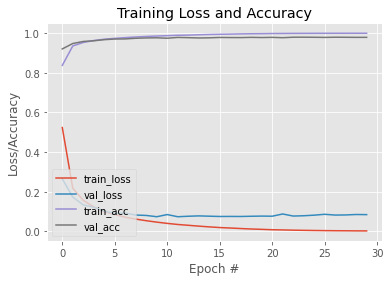

In [119]:
N = 30
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")